# Devisree
# CAR PRICE PREDICTION WITH MACHINE LEARNING


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('CarPrice.csv')

### Data Extraction

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.shape

(205, 26)

In [9]:
df.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [10]:
df['CarName']=df['CarName'].apply(lambda x: x.split(" ")[0])

In [11]:
df.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


<AxesSubplot:xlabel='wheelbase', ylabel='count'>

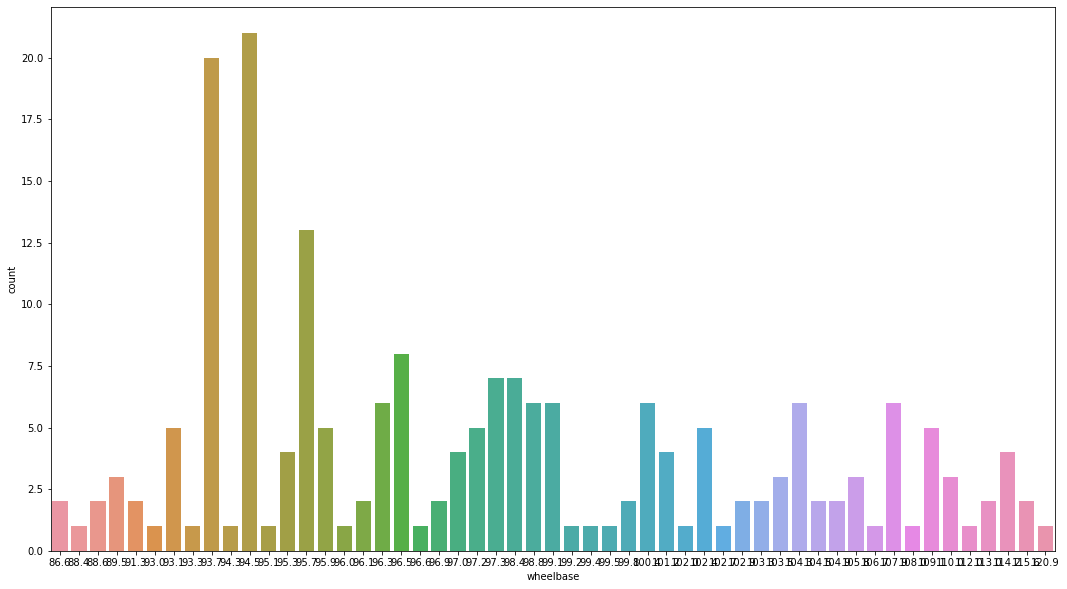

In [12]:
plt.figure(figsize=(18,10))
sns.countplot(df['wheelbase'])

<AxesSubplot:xlabel='carlength', ylabel='count'>

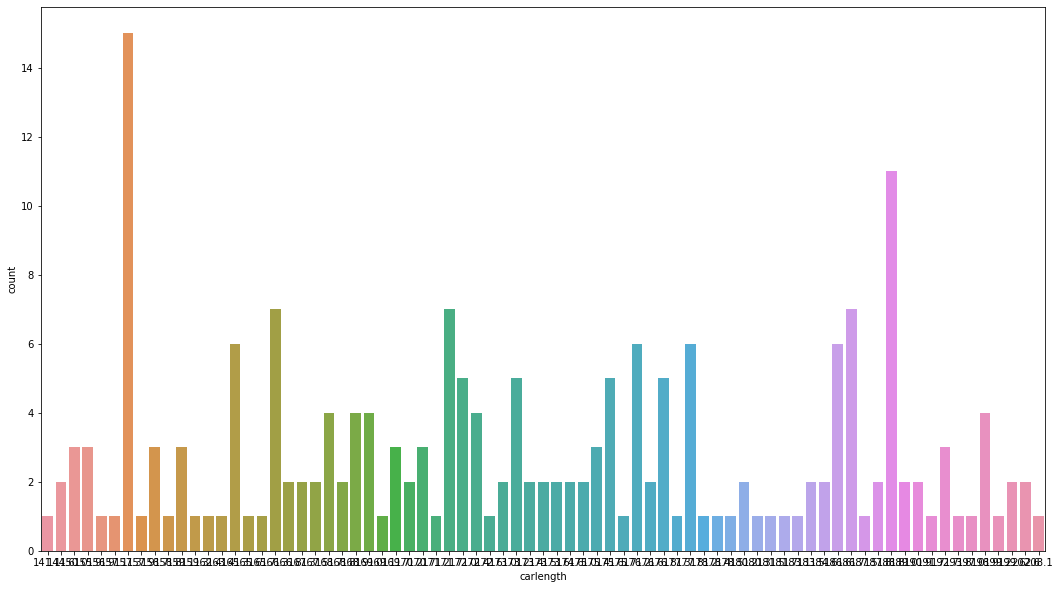

In [13]:
plt.figure(figsize=(18,10))
sns.countplot(df['carlength'])

<AxesSubplot:xlabel='carwidth', ylabel='count'>

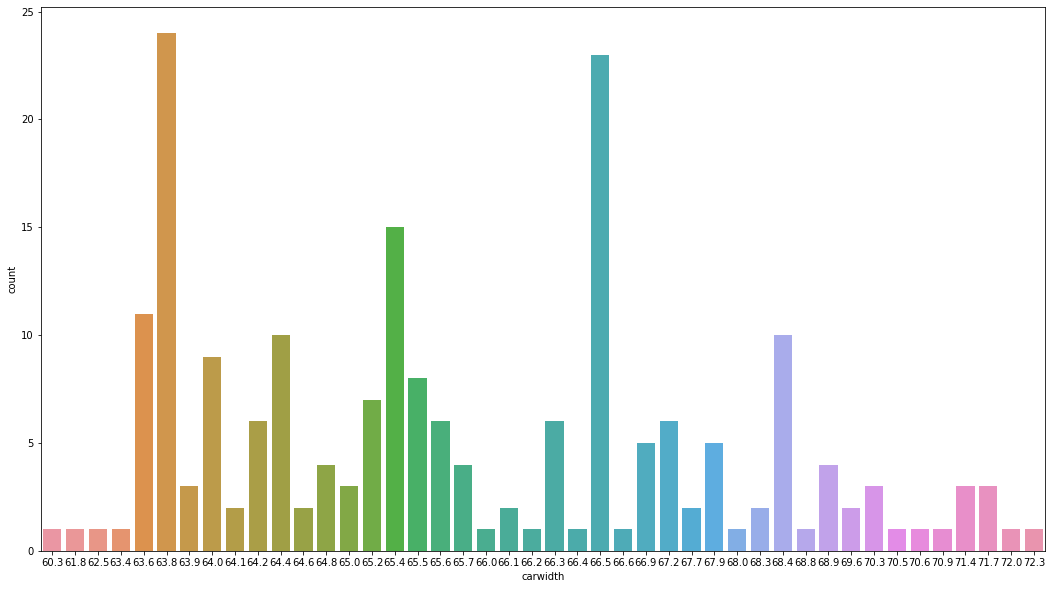

In [14]:
plt.figure(figsize=(18,10))
sns.countplot(df['carwidth'])

<AxesSubplot:xlabel='carheight', ylabel='count'>

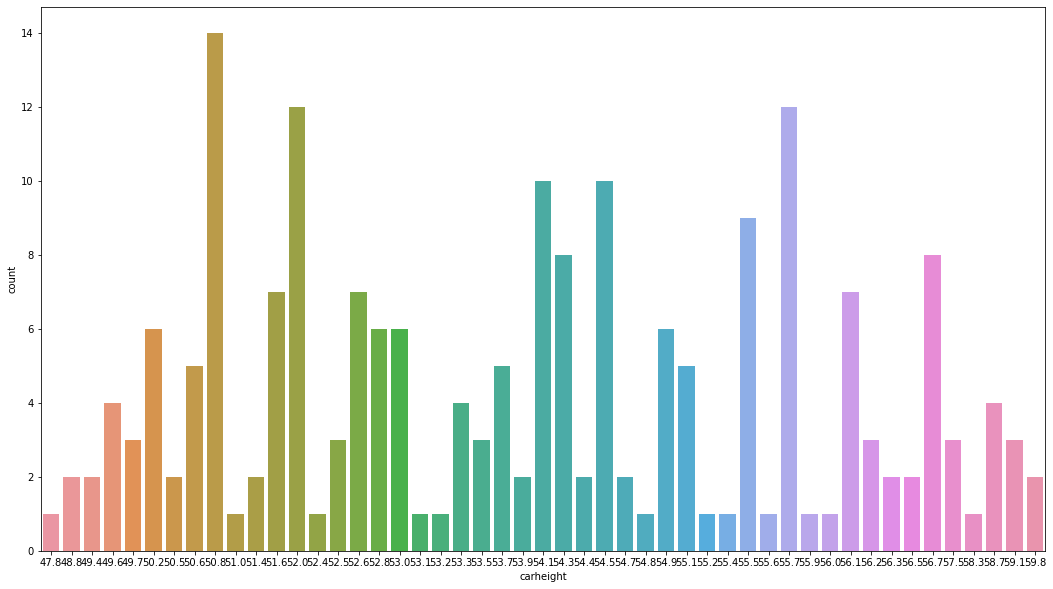

In [15]:
plt.figure(figsize=(18,10))
sns.countplot(df['carheight'])

<AxesSubplot:xlabel='count', ylabel='curbweight'>

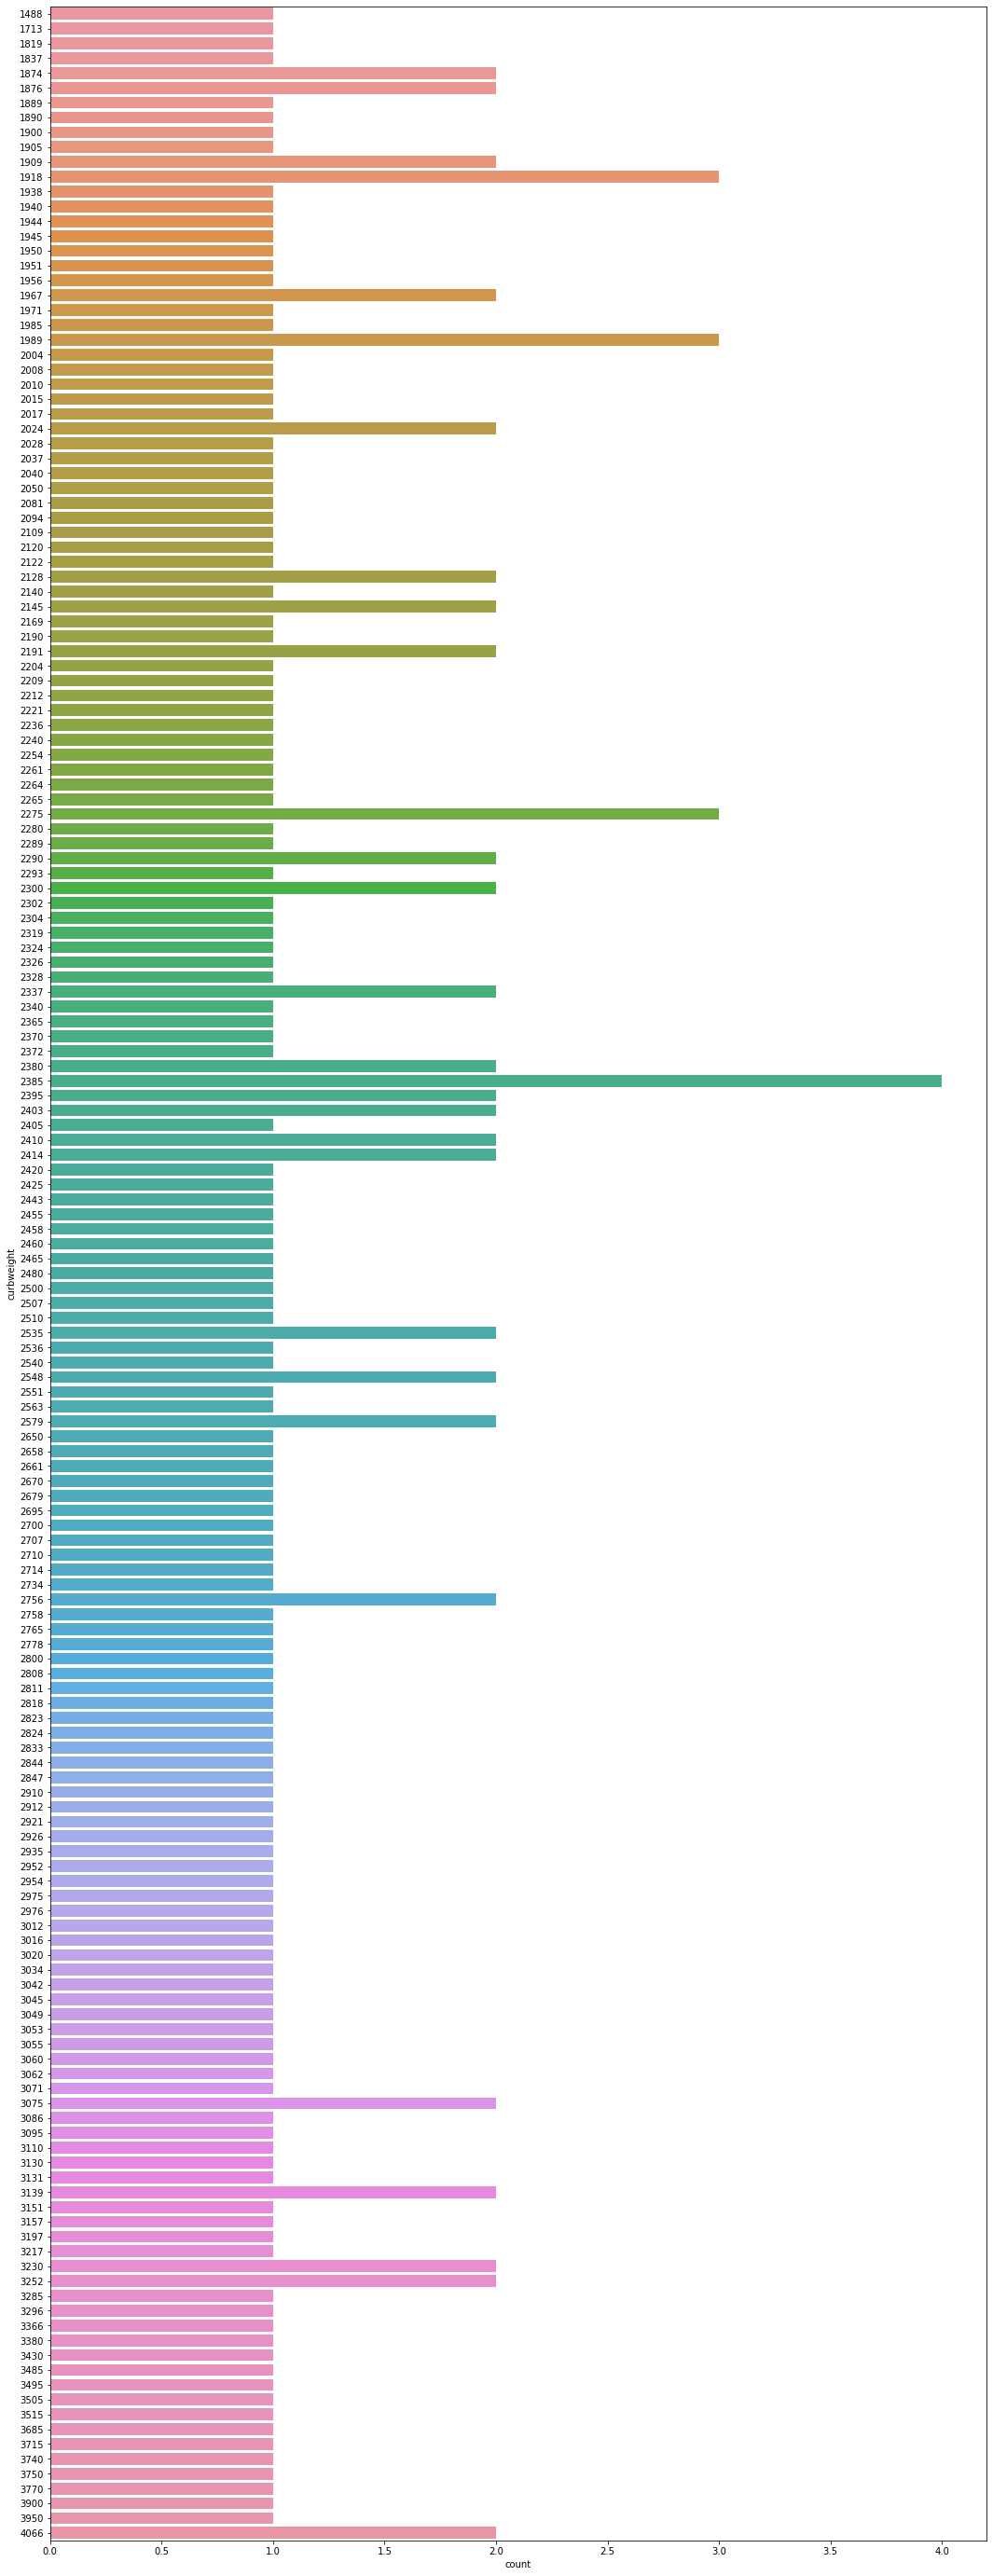

In [16]:
plt.figure(figsize=(18,50))
sns.countplot(y='curbweight',data=df)

<AxesSubplot:xlabel='enginesize', ylabel='count'>

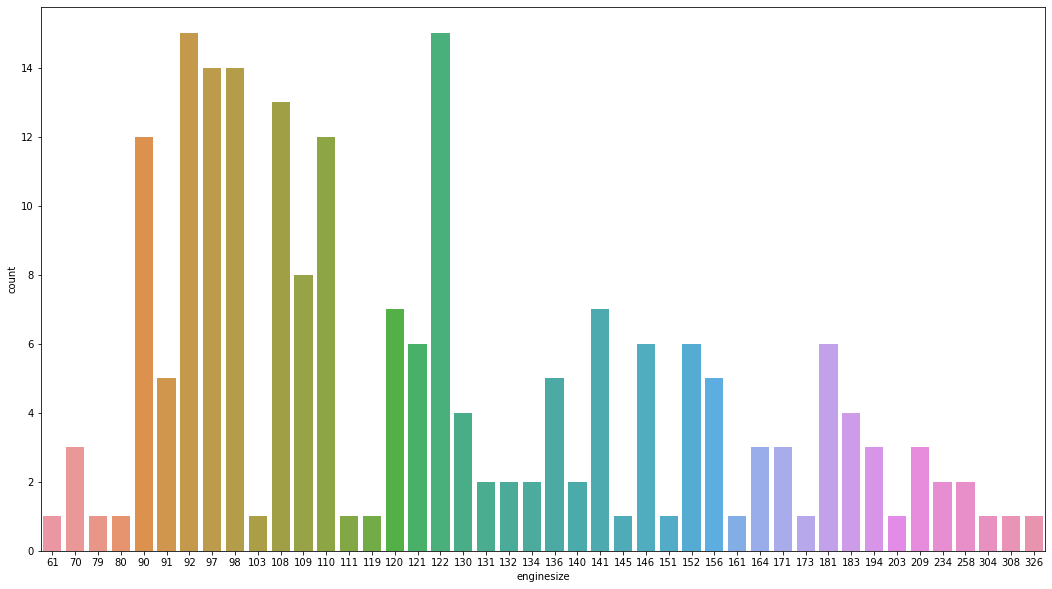

In [17]:
plt.figure(figsize=(18,10))
sns.countplot(df['enginesize'])

<AxesSubplot:xlabel='boreratio', ylabel='count'>

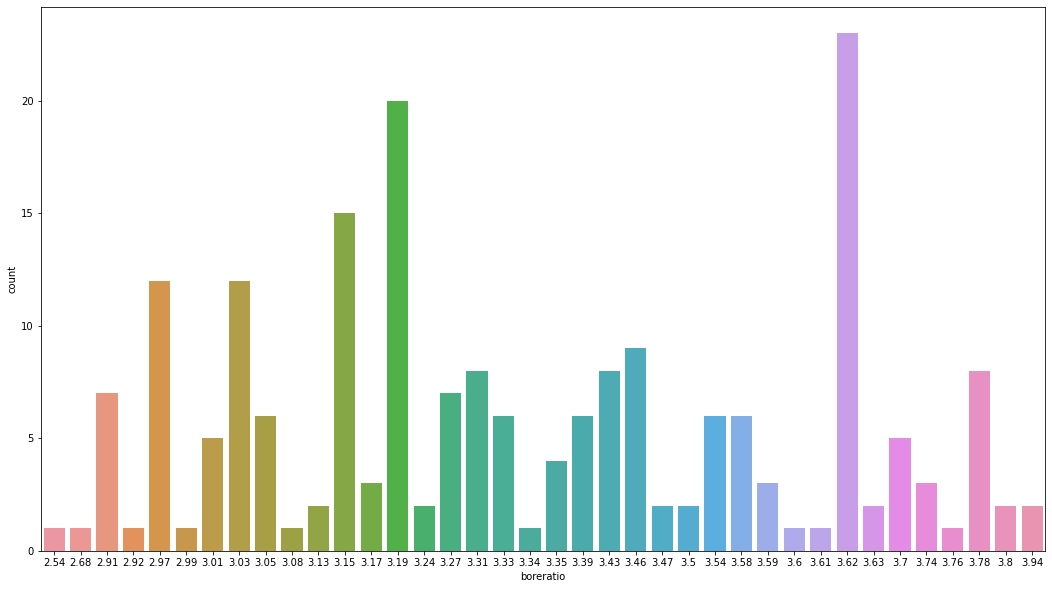

In [18]:
plt.figure(figsize=(18,10))
sns.countplot(df['boreratio'])

<AxesSubplot:xlabel='stroke', ylabel='count'>

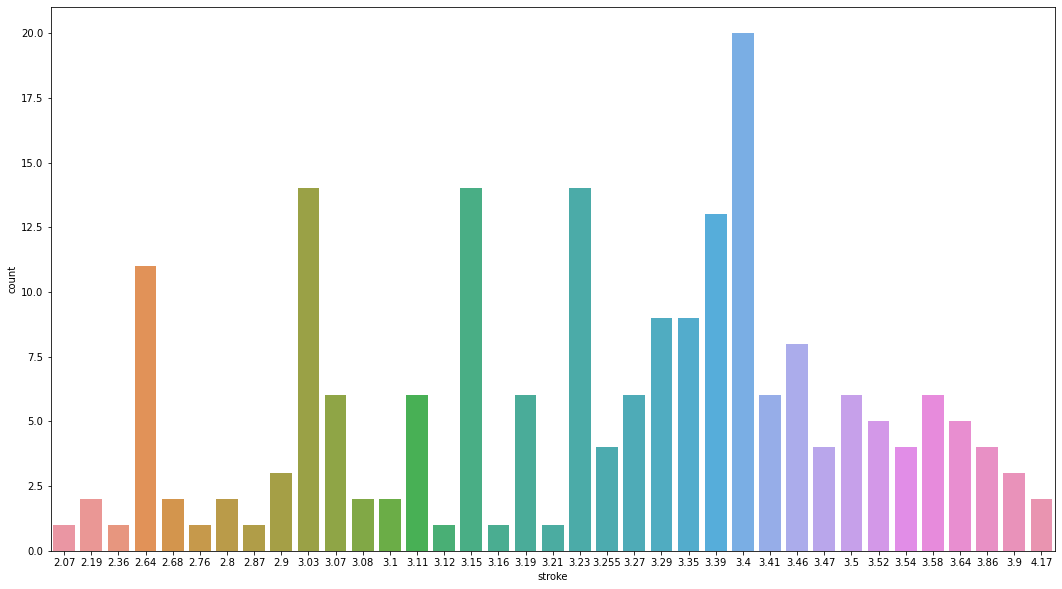

In [19]:
plt.figure(figsize=(18,10))
sns.countplot(df['stroke'])

<AxesSubplot:xlabel='compressionratio', ylabel='count'>

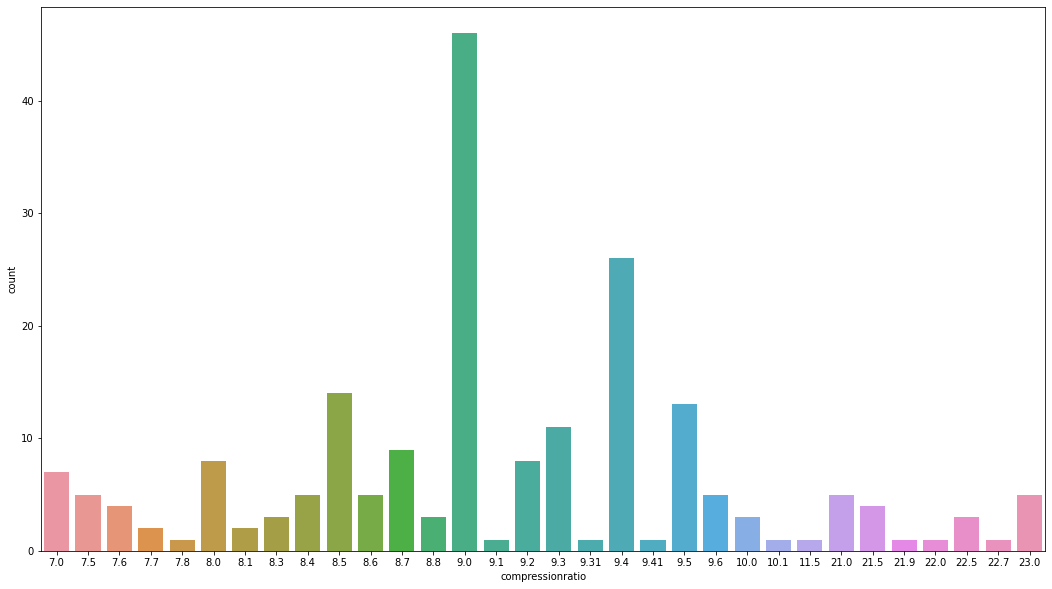

In [20]:
plt.figure(figsize=(18,10))
sns.countplot(df['compressionratio'])

<AxesSubplot:xlabel='horsepower', ylabel='count'>

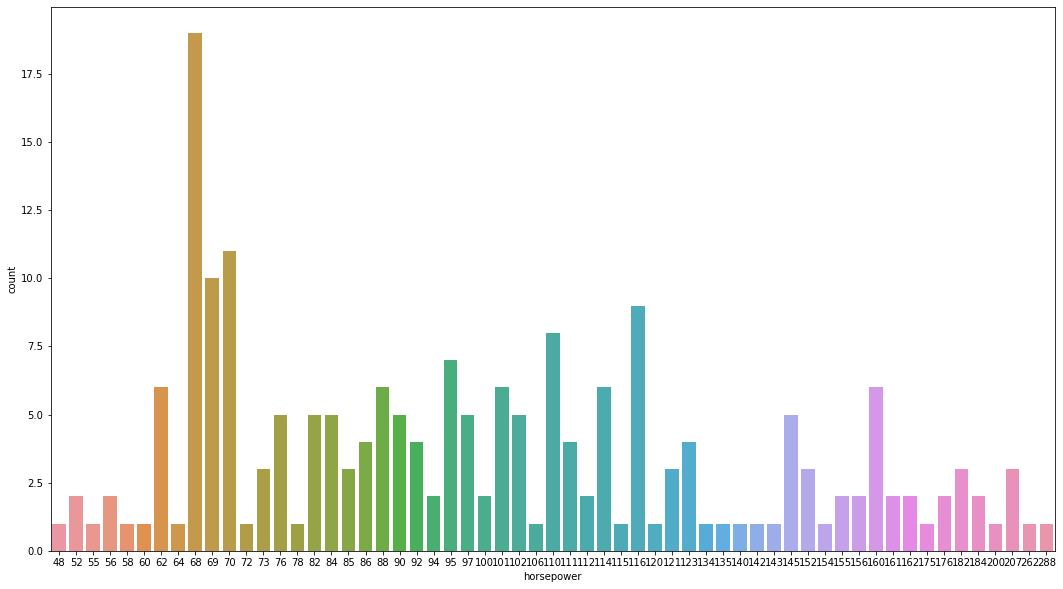

In [21]:
plt.figure(figsize=(18,10))
sns.countplot(df['horsepower'])

<AxesSubplot:xlabel='peakrpm', ylabel='count'>

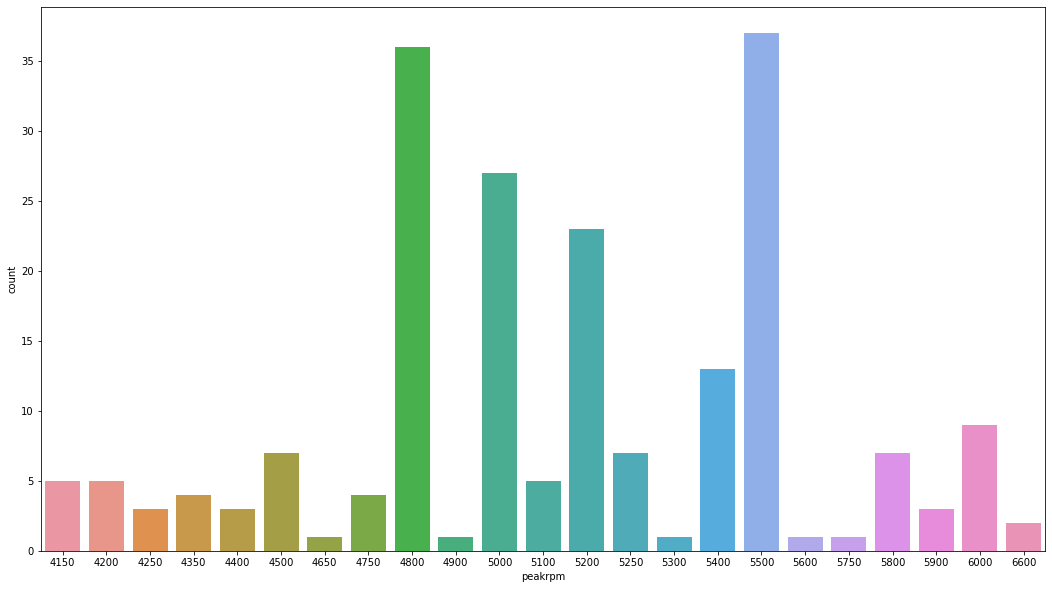

In [22]:
plt.figure(figsize=(18,10))
sns.countplot(df['peakrpm'])

<AxesSubplot:xlabel='citympg', ylabel='count'>

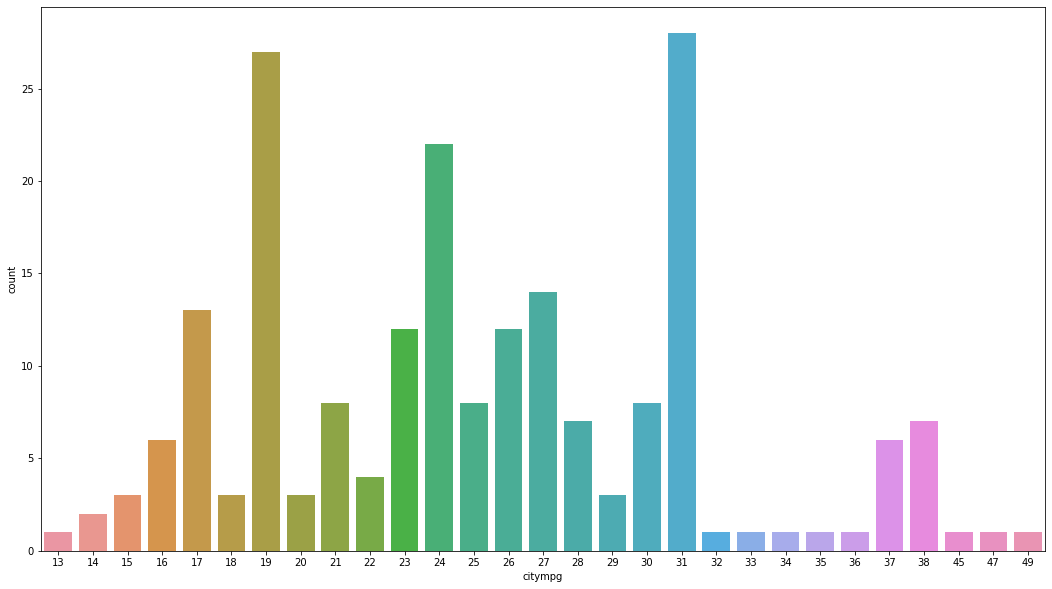

In [23]:
plt.figure(figsize=(18,10))
sns.countplot(df['citympg'])

<AxesSubplot:xlabel='highwaympg', ylabel='count'>

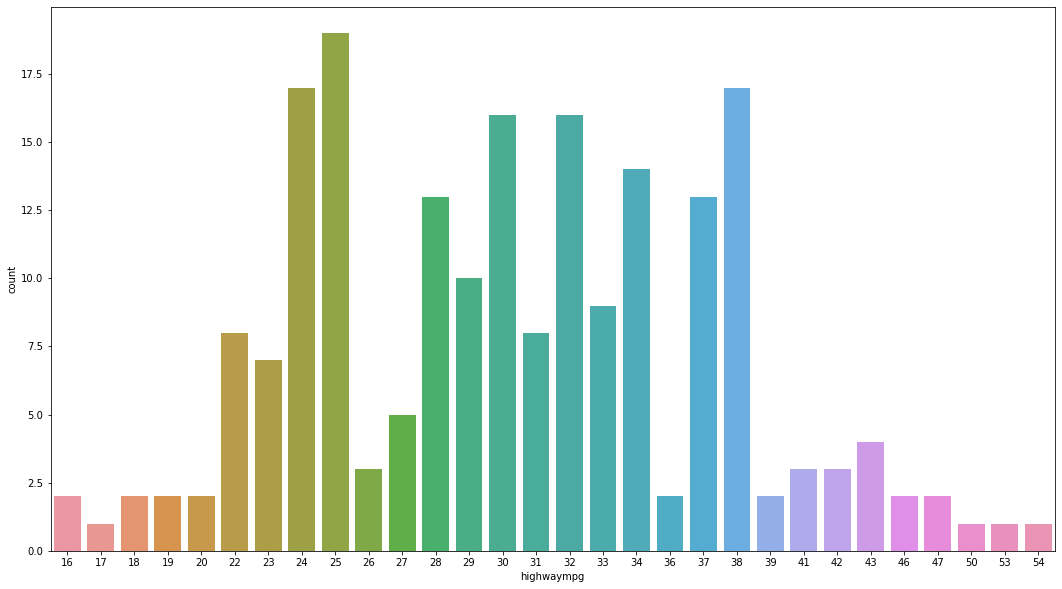

In [24]:
plt.figure(figsize=(18,10))
sns.countplot(df['highwaympg'])

<AxesSubplot:xlabel='price', ylabel='Density'>

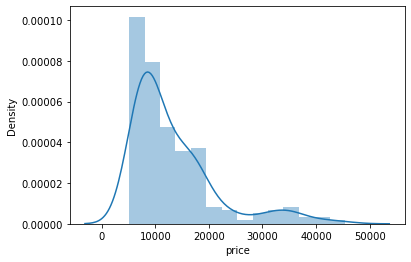

In [25]:
sns.distplot(df['price'])

In [26]:
df.drop(['symboling','car_ID'],axis=1,inplace=True)

In [27]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
df.shape

(205, 24)

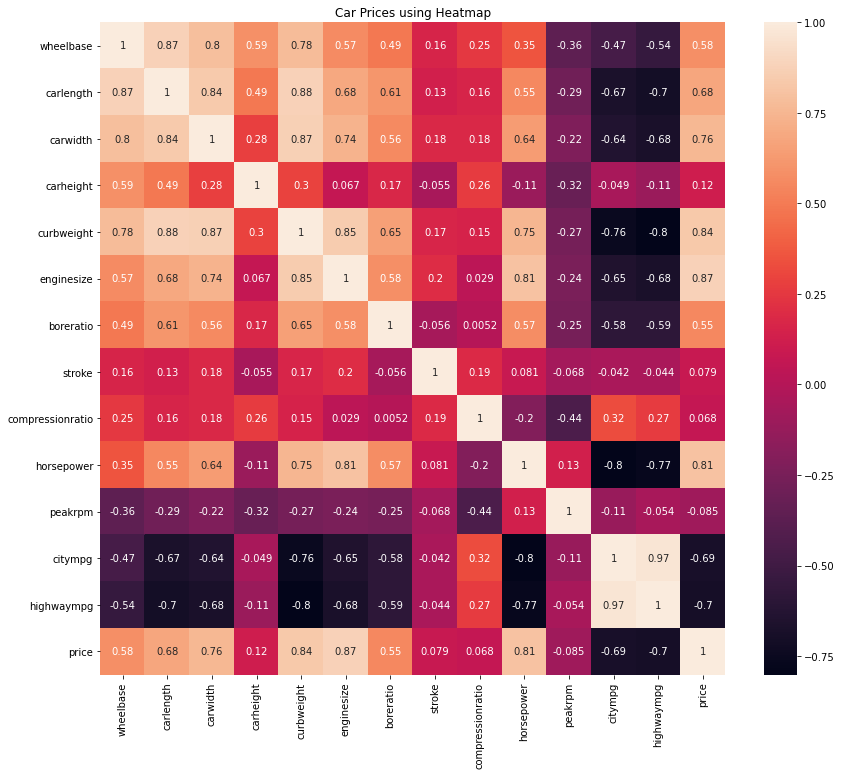

In [29]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)
plt.title("Car Prices using Heatmap")
plt.show()

In [30]:
df['CarName'].astype('category').value_counts()

toyota         32
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
mercury         1
Nissan          1
Name: CarName, dtype: int64

In [31]:
df.loc[df['CarName']=='Nissan','CarName']='nissan'

In [32]:
df.loc[df['CarName']=='maxda','CarName']='mazda'

In [33]:
df.loc[df['CarName']=='porcshce','CarName']='porsche'

In [34]:
df.loc[df['CarName']=='vw','CarName']='volkswagen'

In [35]:
df['CarName'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

In [36]:
data=df.values
# data=df['wheelbase','carlength','carwidth','carheight','curbweight',
#         'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
X=data[:,1:-1]
Y=data[:,-1]

In [37]:
X

array([['gas', 'std', 'two', ..., 5000, 21, 27],
       ['gas', 'std', 'two', ..., 5000, 21, 27],
       ['gas', 'std', 'two', ..., 5000, 19, 26],
       ...,
       ['gas', 'std', 'four', ..., 5500, 18, 23],
       ['diesel', 'turbo', 'four', ..., 4800, 26, 27],
       ['gas', 'turbo', 'four', ..., 5400, 19, 25]], dtype=object)

In [38]:
Y

array([13495.0, 16500.0, 16500.0, 13950.0, 17450.0, 15250.0, 17710.0,
       18920.0, 23875.0, 17859.167, 16430.0, 16925.0, 20970.0, 21105.0,
       24565.0, 30760.0, 41315.0, 36880.0, 5151.0, 6295.0, 6575.0, 5572.0,
       6377.0, 7957.0, 6229.0, 6692.0, 7609.0, 8558.0, 8921.0, 12964.0,
       6479.0, 6855.0, 5399.0, 6529.0, 7129.0, 7295.0, 7295.0, 7895.0,
       9095.0, 8845.0, 10295.0, 12945.0, 10345.0, 6785.0, 8916.5, 8916.5,
       11048.0, 32250.0, 35550.0, 36000.0, 5195.0, 6095.0, 6795.0, 6695.0,
       7395.0, 10945.0, 11845.0, 13645.0, 15645.0, 8845.0, 8495.0,
       10595.0, 10245.0, 10795.0, 11245.0, 18280.0, 18344.0, 25552.0,
       28248.0, 28176.0, 31600.0, 34184.0, 35056.0, 40960.0, 45400.0,
       16503.0, 5389.0, 6189.0, 6669.0, 7689.0, 9959.0, 8499.0, 12629.0,
       14869.0, 14489.0, 6989.0, 8189.0, 9279.0, 9279.0, 5499.0, 7099.0,
       6649.0, 6849.0, 7349.0, 7299.0, 7799.0, 7499.0, 7999.0, 8249.0,
       8949.0, 9549.0, 13499.0, 14399.0, 13499.0, 17199.0, 19699.0,

In [39]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df_dum=df_dummies.values
df=df.values
X=df_dum[:,0:64]
Y=df[:,-1]

In [42]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3)

### Training Model using DecisionTreeRegressor

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
dtree = DecisionTreeRegressor()
dtree.fit(X_train, Y_train)


DecisionTreeRegressor()

In [44]:
Y_pred = dtree.predict(X_test)
dtree_mae = mean_absolute_error(Y_test, Y_pred)
dtree_mae

420.21774193548384

In [45]:
dtree_r2 = r2_score(Y_test,Y_pred)
dtree_r2

0.9852444322959052

In [46]:
from sklearn.model_selection import cross_val_score
dtree_score = cross_val_score(dtree, X_test, Y_test)
print((dtree_score.mean()*100))

93.00598483415908


### Checking Own Data

In [47]:
X_new=[[9.012e+01, 1.734e+02, 6.520e+01, 5.470e+01, 2.395e+03, 1.280e+02,
       3.330e+00, 3.470e+00, 8.500e+00, 9.010e+02, 5.800e+03, 2.700e+01,
       3.400e+01, 9.643e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]
Y_new_pred = dtree.predict(X_new)
print(Y_new_pred)

[10245.]


In [48]:
X_new=[[1.012e+02, 1.768e+02, 5.480e+01, 5.430e+01, 2.395e+03, 1.080e+02,
       3.500e+00, 2.800e+00, 8.800e+00, 1.010e+02, 5.800e+03, 2.300e+01,
       2.900e+01, 1.643e+04, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]]
Y_new_pred = dtree.predict(X_new)
print(Y_new_pred)

[16430.]
